In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.cm as cm
    
import sys  
sys.path.insert(0, '../src/')

import anaclass
import mcmc_aux

### lets play with the toy data (only 30 realizations)

In [3]:
example = anaclass.Realizations("../../data/evo/", 1e8)

In [4]:
example.grab_mass("acc", Nhalo=32000) # grabbing only the relevant mass values!

example.grab_mass("acc_surv", Nhalo=32000)

example.grab_mass("surv", Nhalo=32000)

number of realizations: 278
number of branches/subhalos: 32000
saving to numpy files to the same directory
number of realizations: 278
number of branches/subhalos: 32000
saving to numpy files to the same directory
number of realizations: 278
number of branches/subhalos: 32000
saving to numpy files to the same directory


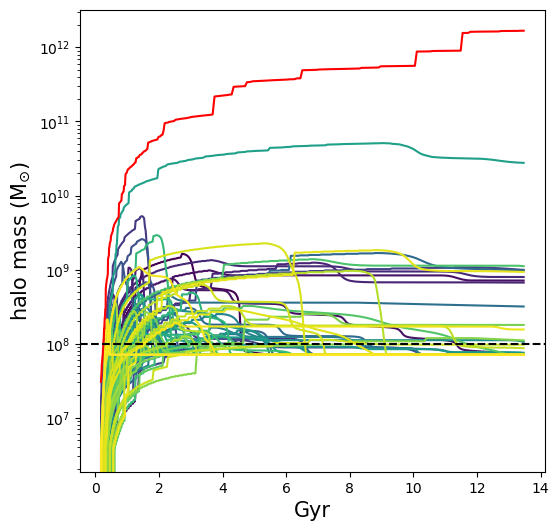

In [5]:
example.plot_single_realization("../../data/evo/tree_12.07_174_evo.npz", nhalo=100)

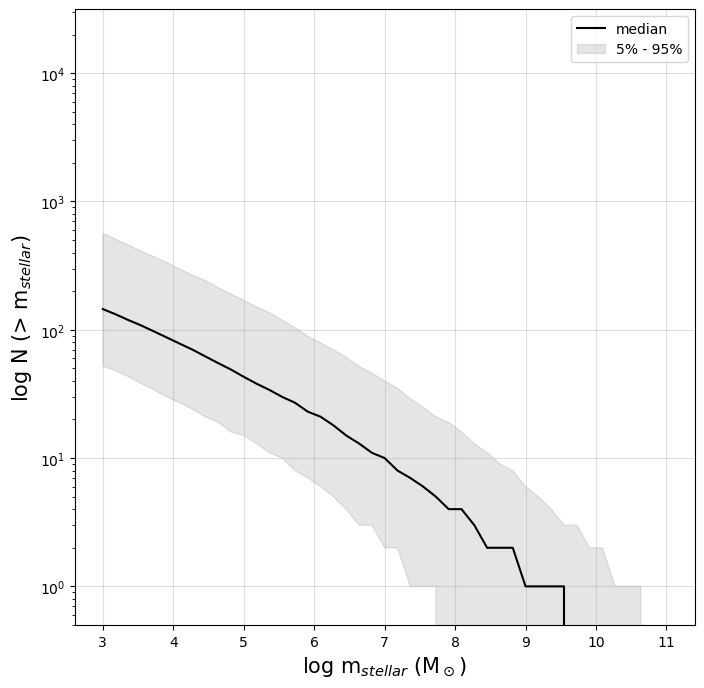

In [5]:
massmat = anaclass.MassMat("../../data/cross_host/acc_surv_mass.npy", phimin=-4, lgMsmin=3, lgMsmax=11) # plotting several different mass functions

massmat.prep_data(convert=True)

massmat.CSMF()

massmat.plot_CSMF()

#massmat.SHMF()

#massmat.plot_SHMF()

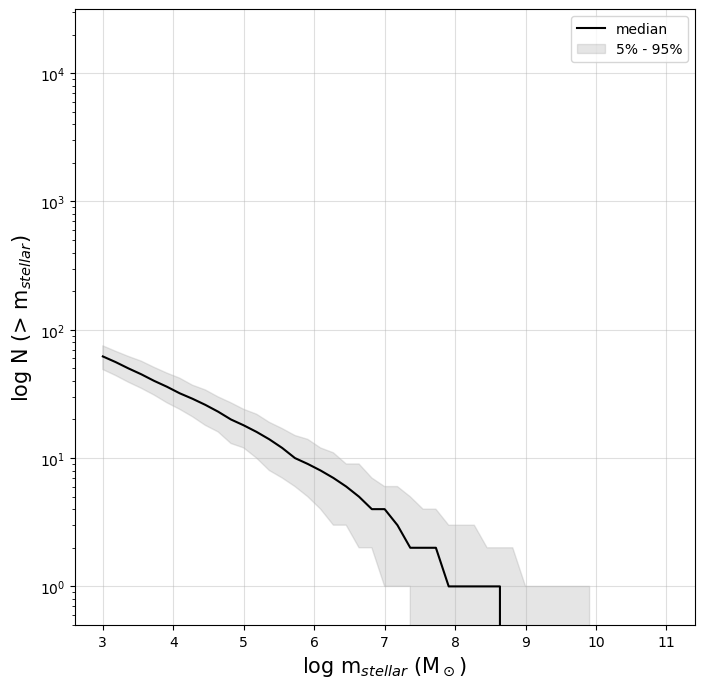

In [7]:
massmat = anaclass.MassMat("../../data/3000_12_8/acc_surv_mass.npy", phimin=-4, lgMsmin=3, lgMsmax=11) # plotting several different mass functions

massmat.prep_data(convert=True)

massmat.CSMF()

massmat.plot_CSMF()

# #massmat.SHMF()

# #massmat.plot_SHMF()

In [8]:
host_halo_PDF = np.load("../etc/halo_mass_PDF_full.npy")

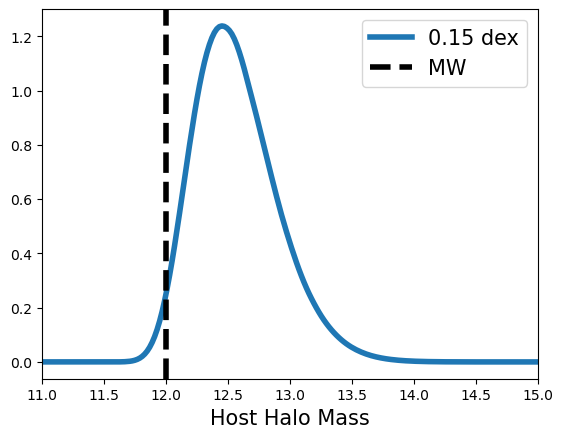

In [9]:
halo = np.load("../etc/halo_mass_PDF_full.npy")
plt.plot(halo[:,0], halo[:,1], lw=4, label="0.15 dex")
plt.xlim(11,15)
plt.axvline(12, label="MW", color="black", ls="--", lw=4)
plt.xlabel("Host Halo Mass", fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [11]:
mass_bins = np.linspace(3,9,45)

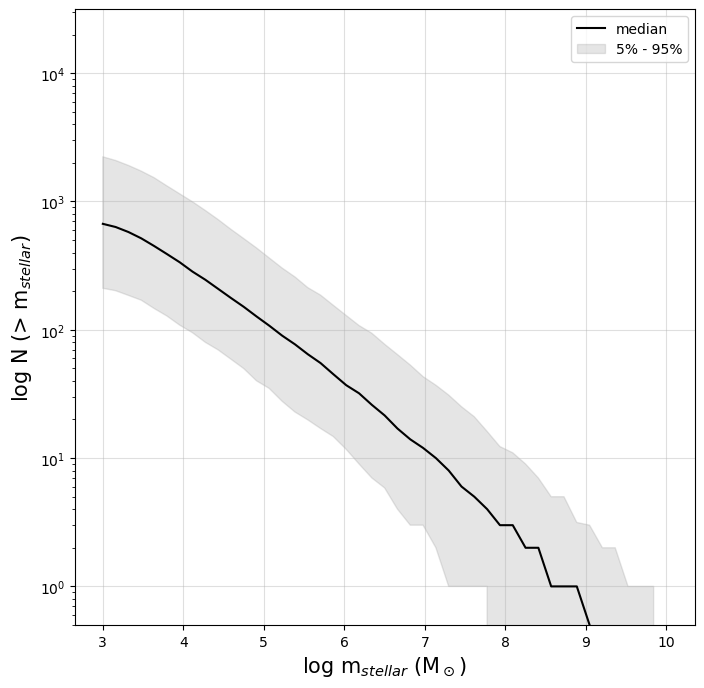

In [12]:

massmat = anaclass.MassMat("../../data/evo/acc_surv_mass.npy", phimin=-4, lgMsmin=3, lgMsmax=10) # plotting several different mass functions

massmat.prep_data(redfile="../../data/evo/acc_redshift.npy")

massmat.CSMF()

massmat.plot_CSMF()

In [13]:
ave_z = np.nanmean(massmat.z, axis=1) #across subhalos

In [14]:
import os

files = []    
for filename in os.listdir("../../data/evo/"):
    if filename.startswith('tree') and filename.endswith('evo.npz'): 
        files.append(os.path.join("../../data/evo/", filename))

In [16]:
def assembly_time(file):
    tree = np.load(file)
    hostmass = tree["mass"][0]
    time = tree["CosmicTime"]
    redshift = tree["redshift"]
    idx = (np.abs(hostmass - hostmass[0]/2)).argmin()
    return np.array([time[idx], redshift[idx], hostmass[0]])

In [17]:
hmm = []
for i in files:
    hmm.append(assembly_time(i))

vals = np.array(hmm)

In [18]:
z = vals[:,1]
Mhosts = vals[:,2]

Text(0.5, 0, 'redshift')

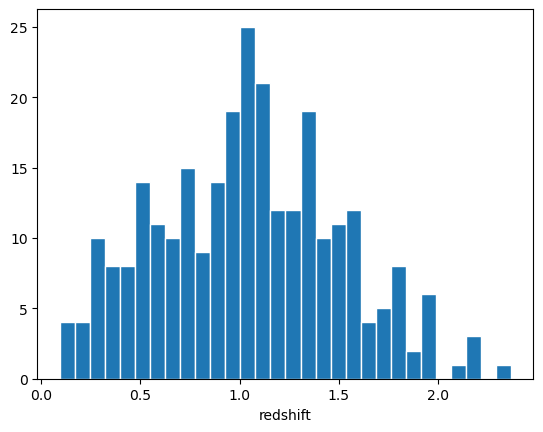

In [19]:
plt.hist(z, bins=30, edgecolor="white")
plt.xlabel("redshift")

Text(0.5, 0, 'Mhosts')

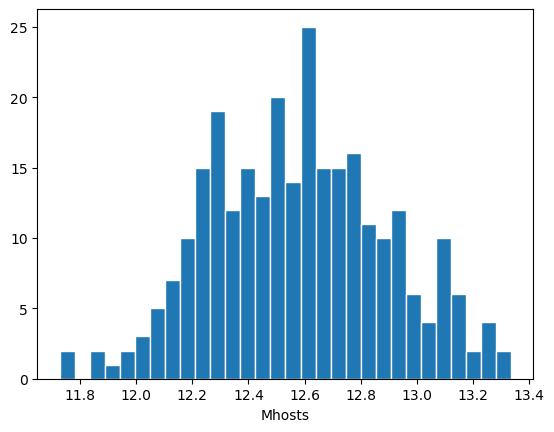

In [20]:
plt.hist(np.log10(Mhosts), bins=30, edgecolor="white")
plt.xlabel("Mhosts")

Text(0, 0.5, 'redshift')

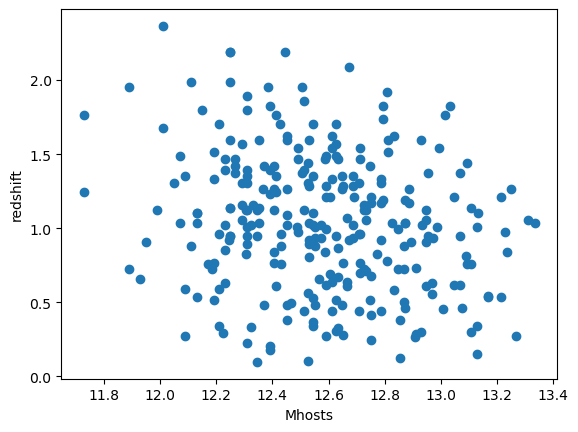

In [21]:
plt.scatter(np.log10(Mhosts),z)
plt.xlabel("Mhosts")
plt.ylabel("redshift")

In [24]:
norm = mpl.colors.Normalize(vmin=z.min(), vmax=z.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.viridis)
colors = mpl.cm.viridis(np.linspace(0, 1, z.shape[0]))

/var/folders/wm/2wnpbn757m34vprj1hp7hwzw0000gn/T/ipykernel_22055/2287565733.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cmap)


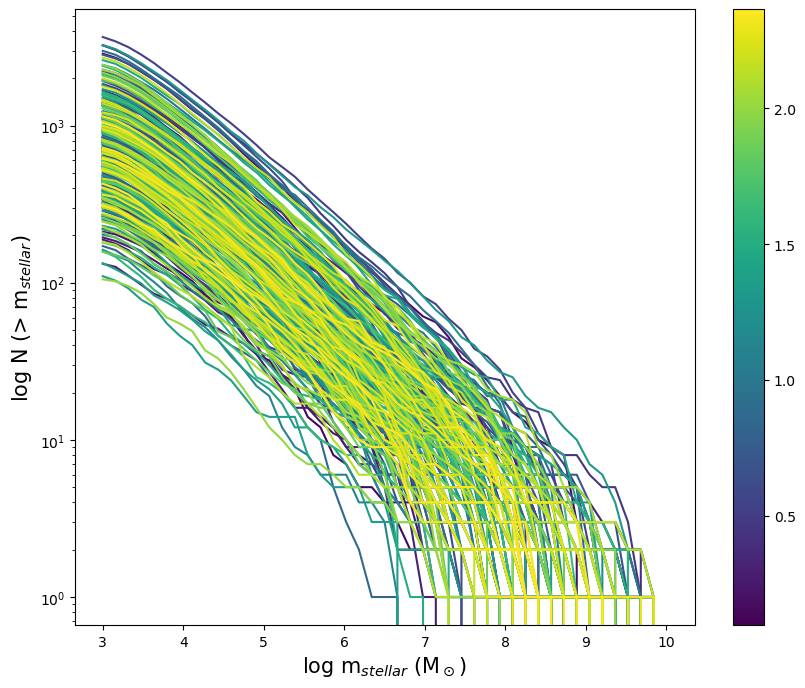

In [25]:
plt.figure(figsize=(10,8))
for i in range(massmat.CSMF_counts.shape[0]):

    plt.plot(massmat.mass_bins, massmat.CSMF_counts[i], color=colors[i])

plt.yscale("log")
plt.xlabel("log m$_{stellar}$ (M$_\odot$)", fontsize=15)
plt.ylabel("log N (> m$_{stellar}$)", fontsize=15)
plt.colorbar(cmap)
plt.show()

In [79]:
covariance = np.zeros(shape=(4,9,9))
samples = [20, 50, 75, 150]

dividing your sample into 155 sets
chose ID 0 as the random sample to use as the real data!


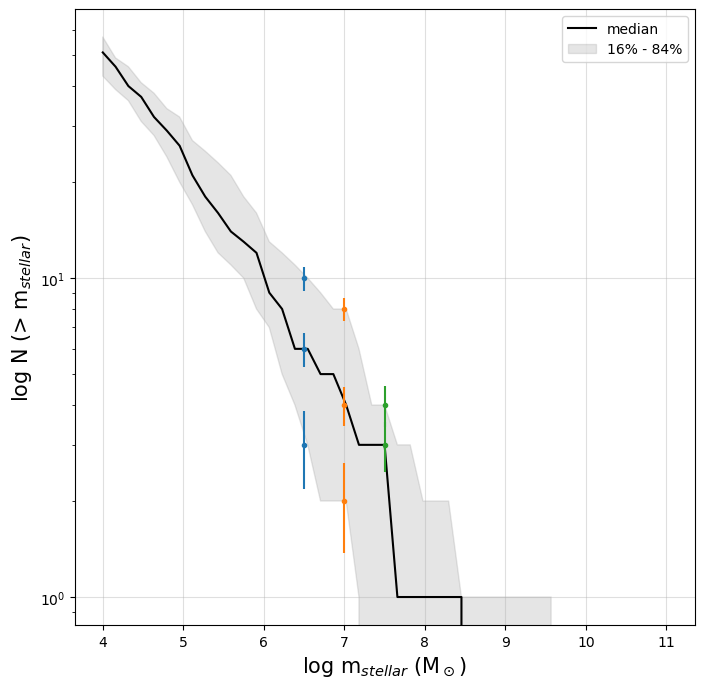

dividing your sample into 61 sets
chose ID 0 as the random sample to use as the real data!


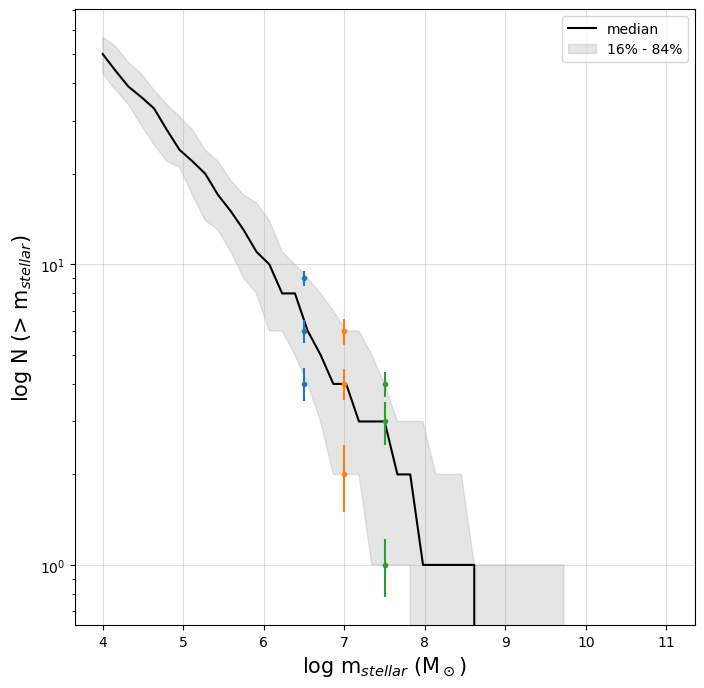

dividing your sample into 40 sets
chose ID 0 as the random sample to use as the real data!


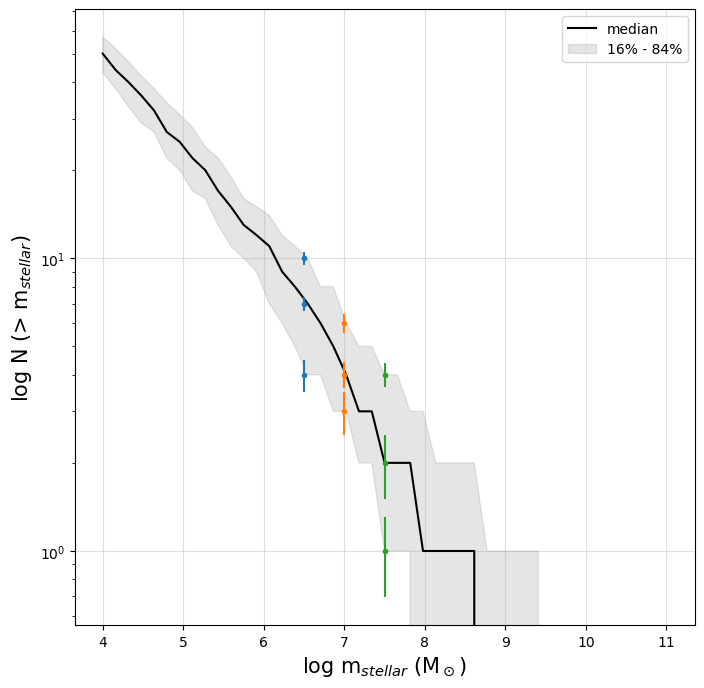

dividing your sample into 19 sets


LinAlgError: Singular matrix

In [80]:
for i in range(4):

    data = mcmc_aux.prep_run("../../data/3000_12_8/", Nsamp=samples[i])

    data.create_SAGA_samples(pick=0)

    data.plot_real_data()

    covariance[i] = data.covariance

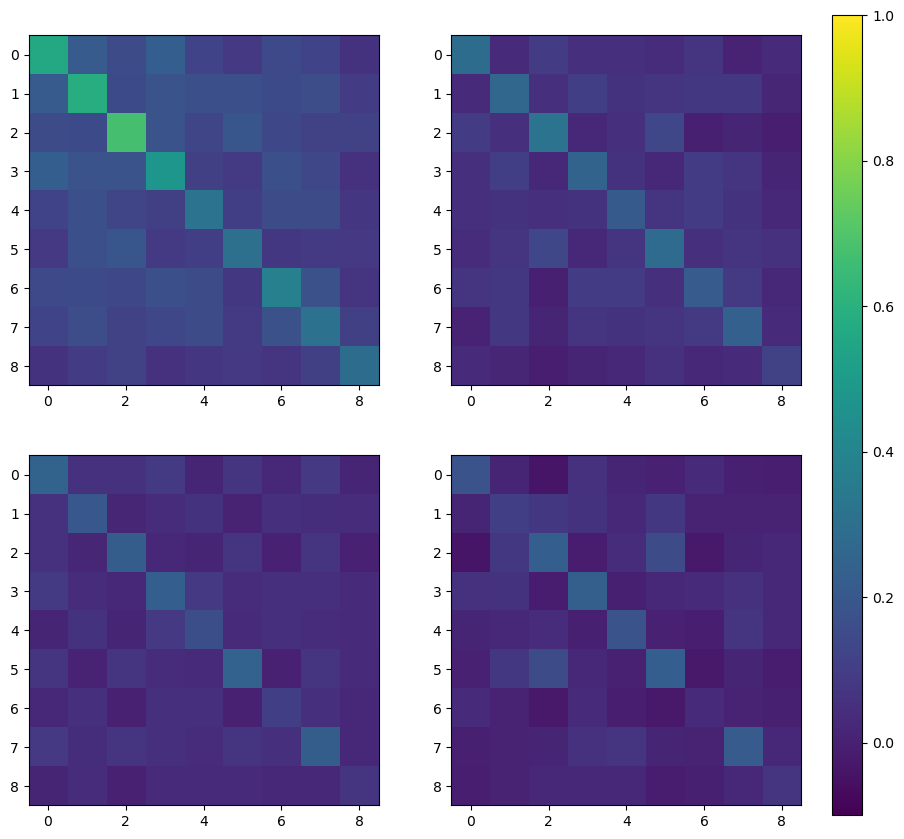

In [78]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
for dat, ax in zip(covariance, axes.flat):
    # The vmin and vmax arguments specify the color limits
    im = ax.imshow(dat, vmin=-0.1, vmax=1)

cax = fig.add_axes([0.93, 0.1, 0.03, 0.8])
fig.colorbar(im, cax=cax)